In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### **Load Data**

In [3]:
df = pd.read_csv('SM.csv')
df.head()

,Timestamp,Age Group,Gender\n,Current Education Level,How much academic pressure do you feel?,How often do you feel stressed due to studies?,How many hours do you sleep on average per night?,What is the main cause of your academic stress?
0,12/13/2025 6:18,15–18,Female,College,4,Sometimes,7–8,1 .Exam and grades pressure
1,12/13/2025 6:24,15–18,Male,College,4,Often,5–6,Exams and Grades Pressure
2,12/13/2025 6:29,15–18,Female,University,3,Sometimes,7–8,financial conditions
3,12/13/2025 7:36,27+,Male,Other,1,Always,7–8,Other
4,12/13/2025 8:01,15–18,Female,College,2,Sometimes,5–6,Prefer not to say


In [4]:
print(df.columns)

Index(['Timestamp', 'Age Group', '  Gender\n  ', '  Current Education Level  ',
       '  How much academic pressure do you feel?  ',
       ' How often do you feel stressed due to studies?',
       '  How many hours do you sleep on average per night?  ',
       '  What is the main cause of your academic stress?  '],
      dtype='object')


### **Rename Columns**

In [5]:
df.rename(columns={'  Gender\n  ':'Gender',
                   '  Current Education Level  ':'Education_level',
                   '  How much academic pressure do you feel?  ':'Pressure_Range',
                   ' How often do you feel stressed due to studies?':'Stress_Range',
                   '  How many hours do you sleep on average per night?  ':'Sleep_time',
                   '  What is the main cause of your academic stress?  ':'Stress_Cause'}, inplace = True )
df.head()

,Timestamp,Age Group,Gender,Education_level,Pressure_Range,Stress_Range,Sleep_time,Stress_Cause
0,12/13/2025 6:18,15–18,Female,College,4,Sometimes,7–8,1 .Exam and grades pressure
1,12/13/2025 6:24,15–18,Male,College,4,Often,5–6,Exams and Grades Pressure
2,12/13/2025 6:29,15–18,Female,University,3,Sometimes,7–8,financial conditions
3,12/13/2025 7:36,27+,Male,Other,1,Always,7–8,Other
4,12/13/2025 8:01,15–18,Female,College,2,Sometimes,5–6,Prefer not to say


In [6]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Timestamp        33 non-null     datetime64[ns]
 1   Age Group        33 non-null     object        
 2   Gender           33 non-null     object        
 3   Education_level  33 non-null     object        
 4   Pressure_Range   33 non-null     int64         
 5   Stress_Range     33 non-null     object        
 6   Sleep_time       33 non-null     object        
 7   Stress_Cause     33 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 2.2+ KB


In [7]:
df['Sleep_time'] = (df['Sleep_time']
.replace('More than 8', '8-9', regex=False)
.astype(str)
.str.replace('–', '-')
.str.split('-')
.apply(lambda x: sum(map(float, x)) / 2))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Timestamp        33 non-null     datetime64[ns]
 1   Age Group        33 non-null     object        
 2   Gender           33 non-null     object        
 3   Education_level  33 non-null     object        
 4   Pressure_Range   33 non-null     int64         
 5   Stress_Range     33 non-null     object        
 6   Sleep_time       33 non-null     float64       
 7   Stress_Cause     33 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 2.2+ KB


In [8]:
df['Age Group'] = (df['Age Group']
                   .replace('27+' , '27-30')
                   .replace('Under 15', '0-15')
                   .astype(str)
                   .str.replace('–', '-')
                   .str.split('-')
                   .apply(lambda x: sum(map(float, x)) / 2)
                   )

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Timestamp        33 non-null     datetime64[ns]
 1   Age Group        33 non-null     float64       
 2   Gender           33 non-null     object        
 3   Education_level  33 non-null     object        
 4   Pressure_Range   33 non-null     int64         
 5   Stress_Range     33 non-null     object        
 6   Sleep_time       33 non-null     float64       
 7   Stress_Cause     33 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 2.2+ KB


In [10]:
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Timestamp        33 non-null     datetime64[ns]
 1   Age Group        33 non-null     float64       
 2   Gender           33 non-null     int64         
 3   Education_level  33 non-null     object        
 4   Pressure_Range   33 non-null     int64         
 5   Stress_Range     33 non-null     object        
 6   Sleep_time       33 non-null     float64       
 7   Stress_Cause     33 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 2.2+ KB


In [11]:
df['Pressure_Range'] = (df['Pressure_Range'].apply(lambda x: 1 if int(x)>= 4 else 0))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Timestamp        33 non-null     datetime64[ns]
 1   Age Group        33 non-null     float64       
 2   Gender           33 non-null     int64         
 3   Education_level  33 non-null     object        
 4   Pressure_Range   33 non-null     int64         
 5   Stress_Range     33 non-null     object        
 6   Sleep_time       33 non-null     float64       
 7   Stress_Cause     33 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 2.2+ KB


In [12]:
df['Education_level'] = df['Education_level'].map({'College': 0, 'University': 1, 'Other': 2})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Timestamp        33 non-null     datetime64[ns]
 1   Age Group        33 non-null     float64       
 2   Gender           33 non-null     int64         
 3   Education_level  33 non-null     int64         
 4   Pressure_Range   33 non-null     int64         
 5   Stress_Range     33 non-null     object        
 6   Sleep_time       33 non-null     float64       
 7   Stress_Cause     33 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 2.2+ KB


In [13]:
X = df.drop(columns=['Pressure_Range', 'Stress_Cause', 'Timestamp','Stress_Range'])
y = df['Pressure_Range']

### **Split and Train**

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
score = accuracy_score(y_test, prediction)
print("Accuracy:", score)

Accuracy: 0.7142857142857143


### **Predicting Pressure Range**

In [17]:
new_prediction = model.predict([[16,0,1,7]])
print(new_prediction)


[0]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### **Academic Pressure Distribution**

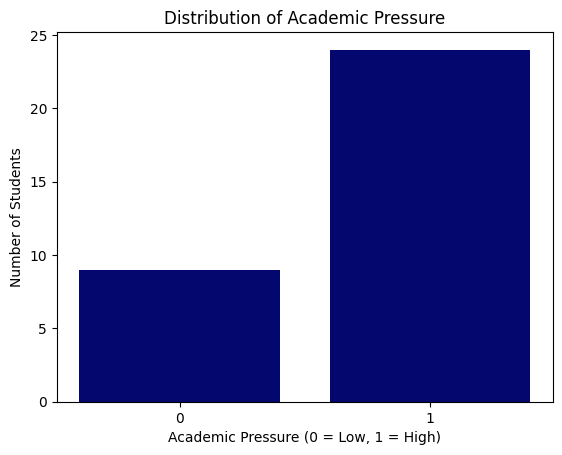

In [27]:
import matplotlib.pyplot as plt

pressure_counts = df['Pressure_Range'].value_counts()
pressure_counts
plt.figure()
plt.bar(pressure_counts.index, pressure_counts.values, color = '#03076e')
plt.xlabel('Academic Pressure (0 = Low, 1 = High)')
plt.ylabel('Number of Students')
plt.title('Distribution of Academic Pressure')
plt.xticks([0, 1])
plt.show()
